# Presentation 1 - Group 4

# AGENDA

In [18]:
# 1. Target values
# 2. Missing values
# 3. Outliers 
# 4. Volatilities
# 5. Correlation 
# 6. Duplicated features

# Installing Libraries

In [19]:
#First, please run this cell and restart your kernel.
#These are all the libraries you need for this python notebook.

%pip install pandas
%pip install numpy
%pip install scipy
%pip install seaborn
%pip install matplotlib
%pip install sklearn
%pip install plotly

%pip install --upgrade pandas
%pip install --upgrade numpy
%pip install --upgrade scipy
%pip install --upgrade seaborn
%pip install --upgrade matplotlib
%pip install --upgrade sklearn
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [20]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import normaltest
from scipy import stats


#Libraries for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import plotly.express as px
init_notebook_mode(connected=True)

# Reading data

In [21]:
#this function is to read, transform and join 2 data frame
#%%
def read_secom():
    path = 'secom.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['feature'+str(x+1) for x in range(len(df.columns))]
    return df


#%%
def read_labels():
    path = 'secom_labels.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['status','timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
    return df

#read 2 df 
df_features = read_secom()
df_target = read_labels()

#concat them vertically
df = pd.concat([df_features,df_target],axis=1)

df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,status,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00


# Pre-defined Functions

In [25]:
#Function adding value label to each bar 
def add_value_labels(ax, spacing):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0  :
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        
        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size=8)              # Vertically align label differently for
                                        # positive and negative values.

#Function for descriptive analysis
def eda(frame,output):
    #output={}
    for col in frame.columns:
        mean=frame[col].mean()
        std= frame[col].std()
        percent_null= pd.isnull(frame[col]).sum()/len(frame[col])*100
        unique=len(pd.unique(frame[col]))
        outlier_df3= frame[(np.abs(stats.zscore(frame[col])) > 3)]
        outlier_df2= frame[(np.abs(stats.zscore(frame[col])) > 2)]
        count_3s_perc=len(outlier_df3)*100/len(frame)
        count_2s_perc=(len(outlier_df2)-len(outlier_df3))*100/len(frame)
        min= frame[col].min()
        q25=frame[col].quantile(0.25)
        q50=frame[col].quantile(0.5)
        q75=frame[col].quantile(0.75)
        max= frame[col].max()
        skewness=frame[col].skew()
        kurtosis=frame[col].kurtosis()
        list = []
        list.append(mean)
        list.append(std)
        list.append(percent_null)
        list.append(unique)
        list.append(count_3s_perc)
        list.append(count_2s_perc)
        list.append(min)
        list.append(q25)
        list.append(q50)
        list.append(q75)
        list.append(max)
        list.append(skewness)
        list.append(kurtosis)
        output[col] = list
    return output;



# A. DATA UNDERSTANDING

## 1 Target values

### 1.1 Frequency distribution

<AxesSubplot:>

findfont: Font family ['CMU Sans Serif'] not found. Falling back to DejaVu Sans.


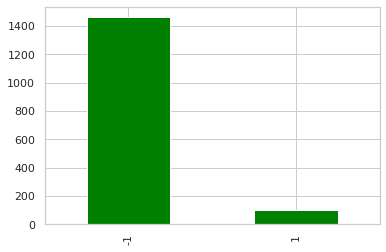

In [11]:
#frequency distribution of target values
df.status.value_counts().plot(kind = 'bar',color='green')

### 1.2 Pie chart

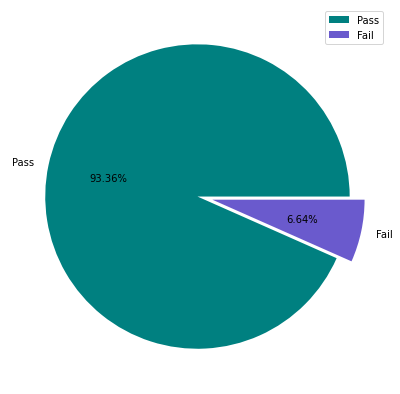

-1    1463
 1     104
Name: status, dtype: int64

In [ ]:
#pie chart for 'status(fail-pass)
plt.rcParams['figure.figsize'] = (7,7)
labels = ['Pass', 'Fail']
size = df['status'].value_counts()
colors = ['teal', 'slateblue']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%")
plt.axis('off')
plt.legend()
plt.show()
df['status'].value_counts()

### 1.3 Distribution of features

#### 1.3.1 Normally Distributed

In [107]:
alpha = 0.05
ntest= df_features.apply(normaltest,nan_policy='omit')
ntest=ntest.transpose()
ntest.columns= ['stat', 'p']
nm_features=ntest[ntest['p']>alpha]
nm_features


,stat,p
feature9,4.485891,0.106145
feature49,1.669308,0.434025
feature84,1.672086,0.433422
feature85,5.204714,0.074099
feature320,2.778687,0.249239


#### 1.3.2 Uniform Distribution

In [108]:
ncol_name= nm_features.index
no_norm=df_features.loc[:, ~df_features.columns.isin(ncol_name)].copy()

uniform_f=result1[result1['std']==0].index
uni_norm=ncol_name.union(uniform_f)
uni_norm

Index(['feature14', 'feature142', 'feature150', 'feature179', 'feature180',
       'feature187', 'feature190', 'feature191', 'feature192', 'feature193',
       ...
       'feature536', 'feature537', 'feature538', 'feature539', 'feature6',
       'feature70', 'feature84', 'feature85', 'feature9', 'feature98'],
      dtype='object', length=121)

#### 1.3.3 Visualising the distribution test result

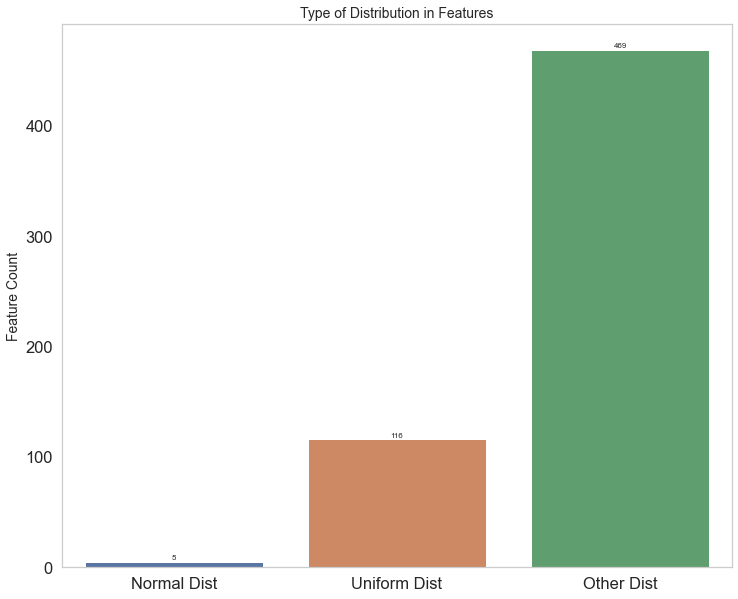

In [112]:
# creating a dataframe with distribution counts
dist = pd.DataFrame(
    [{len(ncol_name)},
    {len(uniform_f)},
    {len(skewed_f.columns)}
    ],index=["Normal Dist","Uniform Dist","Other Dist"])
dist.columns=['Count']
dist.index.name='Dist'
#labels = [item.get_text() for item in ax2.get_xticklabels()]
#ax2.set_xticklabels([str(round(float(label), 2)) + '%' for label in labels],rotation=45,ha="right")
sns.set_style("whitegrid", {'axes.grid' : False})
nx=sns.barplot(x=dist.index,y=dist['Count'],data=dist)
add_value_labels(nx,1)
nx.set_ylabel("Feature Count",size=14,fontname="Arial")
nx.set_xlabel(None)
nx.set_title("Type of Distribution in Features",size=14)
plt.show()

### 1.3 Frequency distribution of Target variable in conjunction with Time

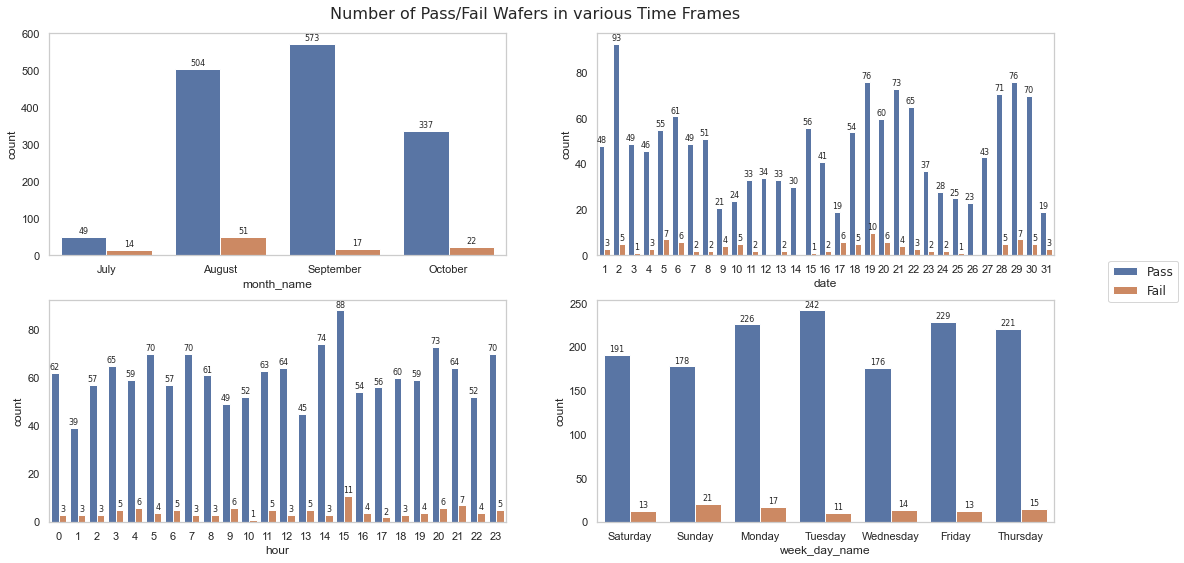

In [35]:
signal_df= df.copy(deep=True)

signal_df['year'] = pd.DatetimeIndex(signal_df['timestamp']).year
signal_df['month'] = pd.DatetimeIndex(signal_df['timestamp']).month
signal_df['month_name'] = pd.DatetimeIndex(signal_df['timestamp']).month_name()
signal_df['date'] = pd.DatetimeIndex(signal_df['timestamp']).day
signal_df['week_day'] = pd.DatetimeIndex(signal_df['timestamp']).weekday
signal_df['week_day_name'] = pd.DatetimeIndex(signal_df['timestamp']).day_name()
signal_df['start_time'] = pd.DatetimeIndex(signal_df['timestamp']).time
signal_df['hour'] = pd.DatetimeIndex(signal_df['timestamp']).hour
signal_df['min'] = pd.DatetimeIndex(signal_df['timestamp']).minute

sns.set_style("whitegrid", {'axes.grid' : False})
fig, axes = plt.subplots(
                     ncols=2,
                     nrows=2,
                     figsize=(18, 9))

mx, dx, wx, hx = axes.flatten()
sns.set(style="whitegrid", font="CMU Sans Serif" )
mx=sns.countplot(ax=axes[0, 0],data=signal_df, x="month_name",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
mx.get_legend().remove()
add_value_labels(mx,1)
#mx.legend(['Pass','Fail'])

sns.set(style="whitegrid", font="CMU Sans Serif" )
dx=sns.countplot(ax=axes[0, 1],data=signal_df, x="date",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
dx.get_legend().remove()
add_value_labels(dx,1)
#dx.legend(['Pass','Fail'])
sns.set(style="whitegrid", font="CMU Sans Serif" )
wx=sns.countplot(ax=axes[1, 1],data=signal_df, x="week_day_name",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
wx.get_legend().remove()
add_value_labels(wx,1)
#wx.legend(['Pass','Fail'])

sns.set(style="whitegrid", font="CMU Sans Serif" )
hx=sns.countplot(ax=axes[1, 0],data=signal_df, x="hour",hue="status")
#signal_df.groupby(['month','status']).size().reset_index(name='count').sort_index()
hx.get_legend().remove()
add_value_labels(hx,1)
#hx.legend(['Pass','Fail'])
handles, labels = mx.get_legend_handles_labels()
fig.legend(handles,['Pass','Fail'] ,loc='center right', fontsize='medium')
fig.suptitle("Number of Pass/Fail Wafers in various Time Frames", fontsize=16,y=0.92)

plt.show()

## 2 Missing Values

### 2.1 Initial check

In [36]:
#Checking if there is any missing value in the data 
df.isna().any().any()

True

In [39]:
#percentage of null values for each column
df_nulls = df.isna().sum()/(len(df))*100
df_nulls=pd.DataFrame(df_nulls)
df_nulls

,0
feature1,0.382897
feature2,0.446713
feature3,0.893427
feature4,0.893427
feature5,0.893427
...,...
feature588,0.063816
feature589,0.063816
feature590,0.063816
status,0.000000


In [40]:
print("Column with lowest amount of missings contains {} % missings.".format(df_nulls.min()))
print("Column with highest amount of missings contains {} % missings.".format(df_nulls.max()))

Column with lowest amount of missings contains 0    0.0
dtype: float64 % missings.
Column with highest amount of missings contains 0    91.193363
dtype: float64 % missings.


In [48]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

df_na = null_values(df_features)
df_na

,Missing_Records,Percentage (%)
feature293,1429,91.193363
feature294,1429,91.193363
feature158,1429,91.193363
feature159,1429,91.193363
feature359,1341,85.577537
...,...,...
feature457,1,0.063816
feature219,1,0.063816
feature357,1,0.063816
feature458,1,0.063816


### 2.2 Histogram of features with % of missing values

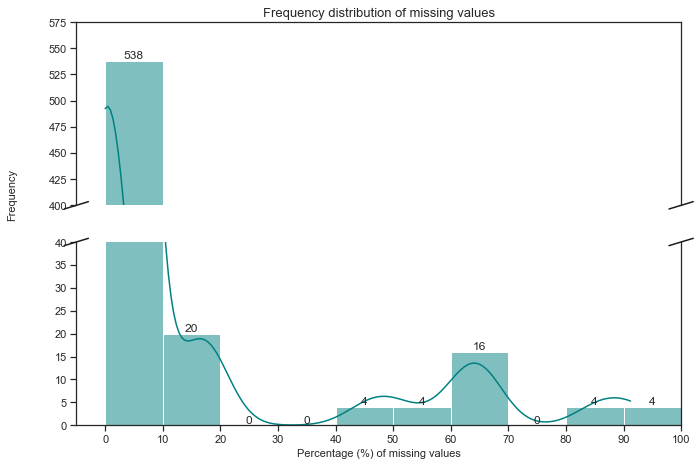

In [60]:
#dictionary for EDA
result={}
result=eda(df_features,result)
result1=pd.DataFrame.from_dict(result,orient='index')
result1.columns=['mean','std', 'percent_null', 'unique', 'count_3s_perc', 'count_2s_perc', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']


#general arrangement for visualization 
large = 16; med = 12; small = 8
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

#broken axis bar chart for percentage of missing values before splitting data 
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")

pal = sns.color_palette(n_colors=3)

f, (ax1,ax2)= plt.subplots(2,1,sharex = True,sharey=False,figsize=(12, 8))
ax1 = sns.histplot(x="percent_null",
                   data=result1, palette=pal, ax=ax1,kde= True, bins=(0,10,20,30,40,50,60,70,80,90,100),color="teal")
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")

ax2 = sns.histplot(x="percent_null",
                   data=result1, palette=pal, ax=ax2,kde= True,bins=(0,10,20,30,40,50,60,70,80,90,100), color="teal")

ax1.set_title('Frequency distribution of missing values', fontsize=13)

ax2.bar_label(ax2.containers[0])
ax1.bar_label(ax1.containers[0])

#ax.set_xticks(bins.round(2))
plt.xticks(rotation=0,fontsize=11)

ax1.set_ylim(400, 575)
ax2.set_ylim(0, 40)
plt.xlim(-5, 100)
plt.xticks([0, 10,20, 30, 40, 50, 60, 70, 80,90, 100, ])

ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Percentage (%) of missing values",size=11)
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.07, 0.55,"Frequency", va="center", rotation="vertical",size=11)


ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.show()

### 2.3 Barchart of features that have missing values > 5%

Text(0.5, 1.0, 'Percentage of Missing Values > 15% per feature ')

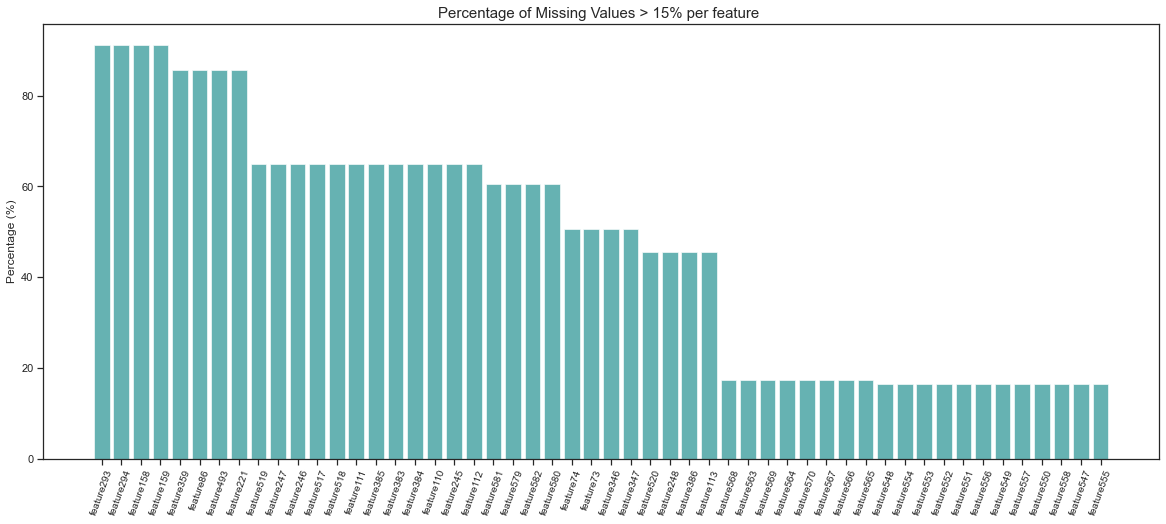

In [62]:
#features that have missing values bigger than 5%
df_na_1 = df_na[df_na["Percentage (%)"] > 15]

# percantage of missing values for each feature > 5%
plt.rcParams['figure.figsize'] = (20, 8)
df_nulls_3 = plt.bar(x=df_na_1.index, height= df_na_1['Percentage (%)'], facecolor='teal', alpha=0.6)
#ax.set_xticks(bins.round(2))
plt.xticks(rotation=70,fontsize=10)
plt.ylabel("Percentage (%)",size=12)
plt.title("Percentage of Missing Values > 15% per feature ",size=15)
 

## 3 Outliers

### 3.1 Barchar for number of features and % of outlier

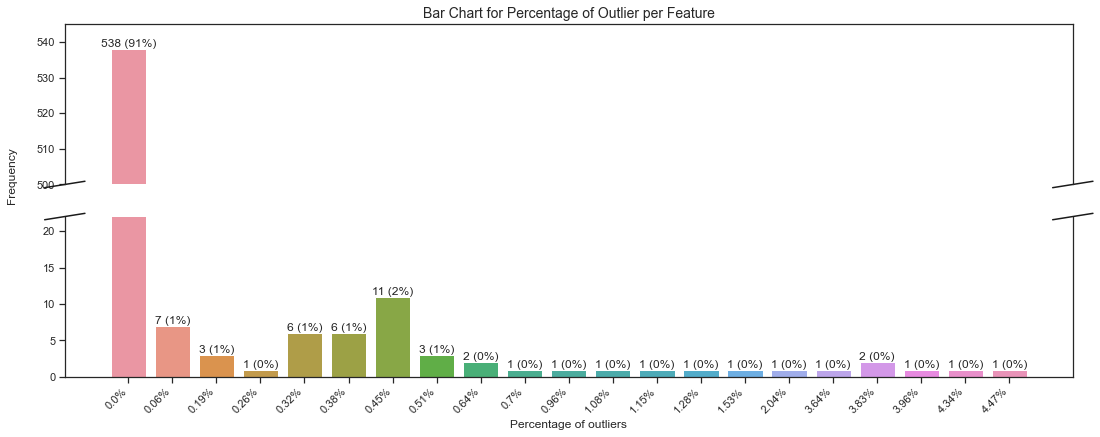

In [63]:
#broken axis bar chart for outlier percentage 
# set style for seaborn plot
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")
# create a color palette (we only have three different colors for the three different tests T1...T3)
pal = sns.color_palette(n_colors=3)
#shared x axis
f, (ax1,ax2)= plt.subplots(2,1,sharex = True,sharey=False,figsize=(20, 7))
ax1 = sns.countplot(x='count_3s_perc',data=result1, ax=ax1)
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")
# we basically do the same thing again for the second plot
ax2 = sns.countplot(x='count_3s_perc',data=result1, ax=ax2)

ax1.set_ylim(500, 545)
ax2.set_ylim(0, 22)
# the upper part does not need its own x axis as it shares one with the lower part
ax1.get_xaxis().set_visible(False)
# by default, each part will get its own "Latency in ms" label, but we want to set a common for the whole figure
# first, remove the y label for both subplots
ax1.set_title("Bar Chart for Percentage of Outlier per Feature", size=14)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Percentage of outliers", size=12 )
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.11, 0.55,"Frequency", va="center", rotation="vertical")

# let's put some ticks on the top of the upper part and bottom of the lower part for style
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()
#xlabels = ['{:,.3f}'.format(x) + '%' for x in ax2.get_xticks()]
labels = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels([str(round(float(label), 2)) + '%' for label in labels],rotation=45,ha="right")

abs_values = result1['count_3s_perc'].value_counts().sort_index()
rel_values = result1['count_3s_perc'].value_counts(normalize=True).sort_index().values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax1.bar_label(container=ax1.containers[0], labels=lbls)
ax2.bar_label(container=ax2.containers[0], labels=lbls)
#labels = [f' {v.get_width()}\n {df.iloc[i, 1]}%' for i, v in enumerate(ax.containers[0])]


# finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)
#add_value_labels(ax2,5)

# label each bar in histogram
#plt.show()
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
d = .02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.show()


### 3.2 Barchart of features with % of outliers > 0%

Text(0.5, 1.0, 'Percentage of Outliers Per Feature > 0%')

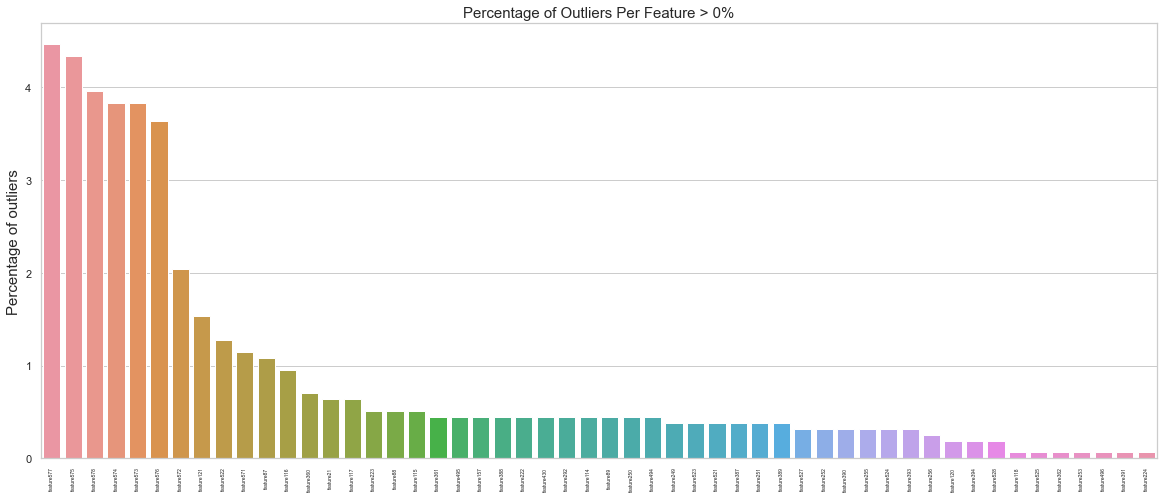

In [67]:
#visualizing features having outliers
result1_out= result1.loc[result1['count_3s_perc'] > 0]
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=result1_out.index, y=result1_out['count_3s_perc'], data=result1_out, order=result1_out.sort_values('count_3s_perc',ascending = False).index)

for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_size(5)
ax.set_ylabel("Percentage of outliers", size=15 )
ax.set_title("Percentage of Outliers Per Feature > 0%", size=15 )

## 4 Volatility

### 4.1 Volatility histogram without Smooth curve

In [ ]:
#scaling data for volatility check 
scaler = MinMaxScaler()
#It seems like the Scaler works only with series. When we scale the whole dataframe, the datafram will be broken down.
#Then we need to form the dataframe again.
df_features_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)
df_features_scaled

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.0,0.328562,0.965785,0.665019,0.542479,...,NaN,NaN,0.709375,0.012325,0.017510,0.011880,NaN,NaN,NaN,NaN
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.0,0.428942,0.969673,0.656639,0.412315,...,0.181159,0.282386,0.753125,0.034637,0.036965,0.033099,0.221387,0.220339,0.181159,0.282386
2,0.308868,0.583388,0.493903,0.457065,0.000744,0.0,0.283455,0.965008,0.542759,0.448168,...,0.500000,0.112383,0.562500,0.020612,0.021401,0.020152,0.629073,0.589309,0.500000,0.112383
3,0.400385,0.466998,0.543479,0.244894,0.000574,0.0,0.469123,0.946345,0.638590,0.319564,...,0.123188,0.100153,0.662500,0.009137,0.007782,0.008734,0.309942,0.152542,0.123188,0.100153
4,0.471367,0.500400,0.678327,0.357067,0.000765,0.0,0.387631,0.960342,0.670606,0.392050,...,NaN,NaN,0.068750,1.000000,1.000000,1.000000,0.309942,0.152542,0.123188,0.100153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.254718,0.444401,0.467675,0.830510,0.000721,0.0,0.002453,0.970451,0.325312,0.381138,...,0.134058,0.275560,0.656250,0.017637,0.021401,0.017016,0.197995,0.138201,0.134058,0.275560
1563,0.504102,0.529017,0.541646,0.302731,0.000175,0.0,0.346719,0.937014,0.520627,0.368667,...,NaN,NaN,0.615625,0.015087,0.018482,0.014538,0.197995,0.138201,0.134058,0.275560
1564,0.384221,0.321409,0.572020,0.298919,0.000128,0.0,0.366738,0.939347,NaN,NaN,...,0.054348,0.059030,0.653125,0.019762,0.023346,0.018974,0.305764,0.070404,0.054348,0.059030
1565,0.247394,0.542774,0.457071,0.318631,0.000800,0.0,0.353699,0.943235,0.582725,0.360094,...,0.235507,0.126805,0.706250,0.025074,0.020428,0.024144,0.360067,0.277705,0.235507,0.126805


In [ ]:
df_eda = df_features_scaled.describe().T
df_eda

,count,mean,std,min,25%,50%,75%,max
feature1,1561.0,0.442356,0.120079,0.0,0.363752,0.437523,0.511181,1.0
feature2,1560.0,0.490192,0.116924,0.0,0.426788,0.495361,0.552680,1.0
feature3,1553.0,0.549425,0.115917,0.0,0.472825,0.551465,0.618191,1.0
feature4,1553.0,0.375871,0.118893,0.0,0.291215,0.345949,0.428319,1.0
feature5,1553.0,0.003156,0.050595,0.0,0.000302,0.000570,0.000758,1.0
...,...,...,...,...,...,...,...,...
feature586,1566.0,0.019064,0.036471,0.0,0.011304,0.015903,0.021382,1.0
feature587,1566.0,0.320455,0.103243,0.0,0.253342,0.312448,0.371763,1.0
feature588,1566.0,0.173076,0.114831,0.0,0.096480,0.151239,0.222947,1.0
feature589,1566.0,0.155193,0.103879,0.0,0.083333,0.130435,0.195652,1.0


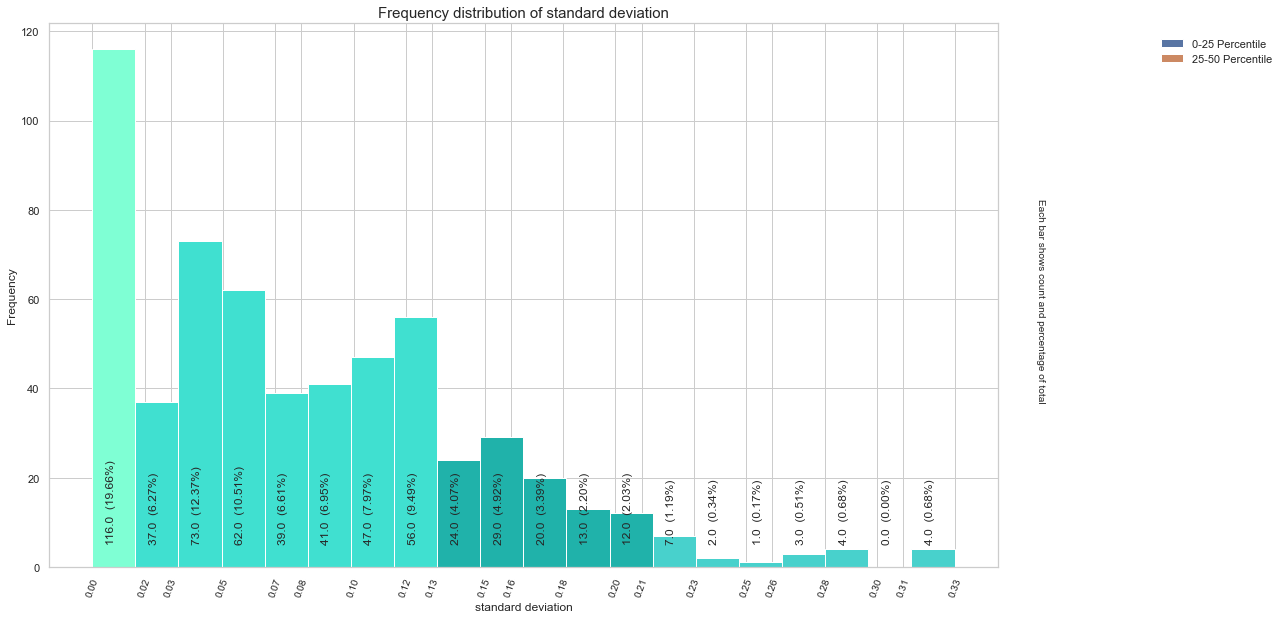

In [71]:
# Colours for different percentiles
perc_25_colour = 'aquamarine'
perc_50_colour = 'turquoise'
perc_75_colour = 'lightseagreen'
perc_95_colour = 'mediumturquoise'

fig, ax = plt.subplots(figsize=(17,10))

counts, bins, patches = ax.hist(df_eda['std'], facecolor=perc_50_colour, bins=20, edgecolor='white')

ax.set_xticks(bins.round(2))
plt.xticks(rotation=70,fontsize=10)

ax.set_title('Frequency distribution of standard deviation', fontsize=15)
ax.set_xlabel('standard deviation', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

twentyfifth, seventyfifth, ninetyfifth = np.percentile(df_eda['std'], [25, 75, 95])
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
        
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

ax.annotate('Each bar shows count and percentage of total',
            xy=(.85,.30), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=10, bbox=dict(boxstyle="round", fc="white"),
            rotation=-90)

#handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

### 4.2 Volatility histogram with Smooth curve

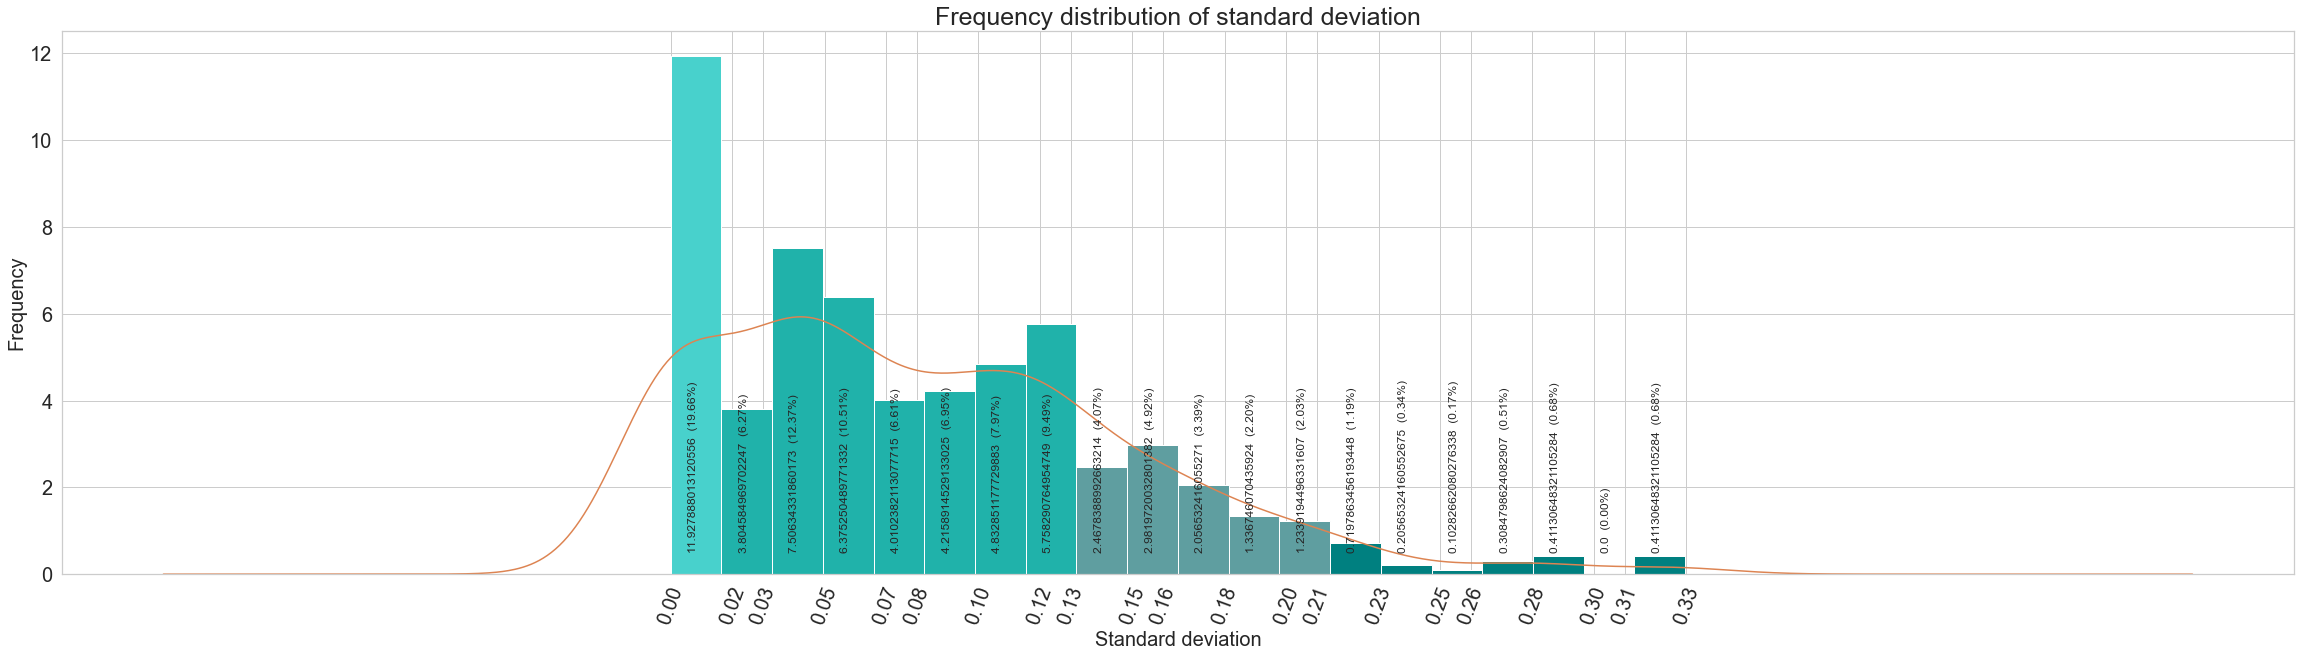

In [76]:
# volatility histogram with line
# Colours for different percentiles
perc_25_colour = 'mediumturquoise'
perc_50_colour = 'lightseagreen'
perc_75_colour = 'cadetblue'
perc_95_colour = 'teal'

# Plot the Histogram 
fig, ax = plt.subplots(figsize=(40,10))

counts, bins, patches = ax.hist(df_eda['std'], facecolor=perc_50_colour, bins=20, edgecolor='white',density=True)

df_eda['std'].plot(kind = "kde")

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=70,fontsize=20)
plt.yticks(fontsize=20)

# Set the graph title and axes titles
ax.set_title('Frequency distribution of standard deviation', fontsize=25)
ax.set_xlabel('Standard deviation', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)


# Change the colors of bars at the edges
twentyfifth, seventyfifth, ninetyfifth = np.percentile(df_eda['std'], [25, 75, 95])
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
        

bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')


#create legend
#handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
#labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
#plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

## 5 Correlation

### 3.1 Corelation heatmap

Text(0.5, 1.0, 'Correlation heatmap for the Features')

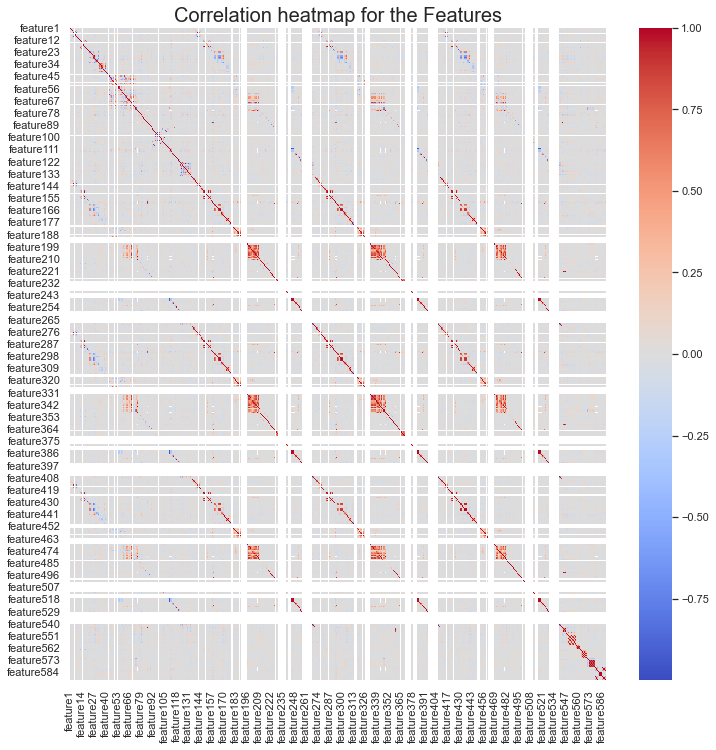

In [77]:
#this plot is just to show corr pattern, we cannot use it for any cleaning purpose
plt.rcParams['figure.figsize'] = (12, 12) #this is to set the size for the plot, making it bigger
sns.heatmap(df_features.corr(), cmap = "coolwarm")
plt.title('Correlation heatmap for the Features', fontsize = 20)

#The white lines are due to corr(a,b)=NaN
#One of the columns are having std()=0

In [ ]:
#Checking features with corr = NaN
df_features.iloc[:,[489,462]].corr()

,feature490,feature463
feature490,1.0,NaN
feature463,NaN,NaN


### 3.2 Correlation heatmap with Zoom-in views

Text(0.5, 1.0, 'Correlation heatmap for the Features (zoom in)')

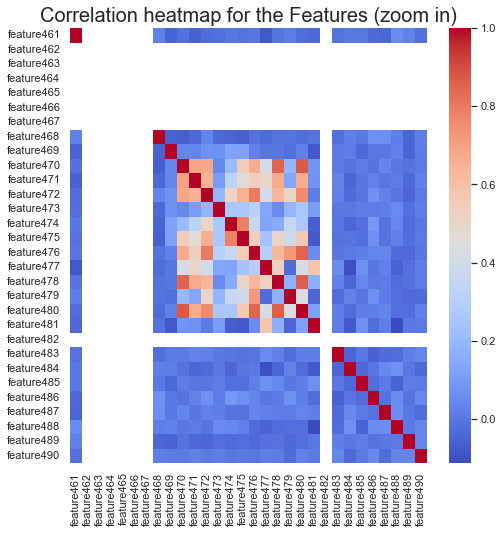

In [78]:
plt.rcParams['figure.figsize'] = (8, 8) #this is to set the size for the plot, making it bigger
sns.heatmap(df_features.iloc[:,np.arange(460,490,1)].corr(), cmap = "coolwarm")
plt.title('Correlation heatmap for the Features (zoom in)', fontsize = 20)

Text(0.5, 1.0, 'Correlation heatmap for the Features (zoom in)')

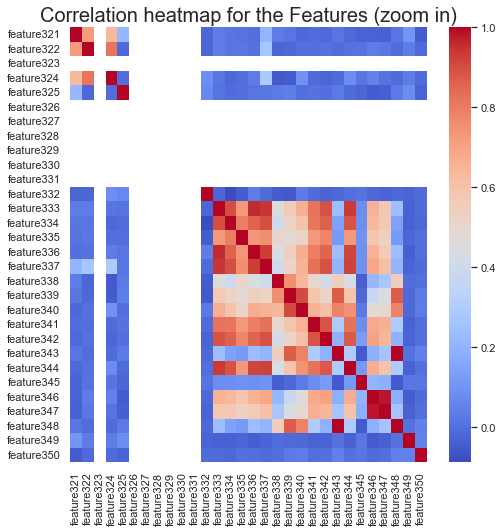

In [79]:
plt.rcParams['figure.figsize'] = (8, 8) #this is to set the size for the plot, making it bigger
sns.heatmap(df_features.iloc[:,np.arange(320,350,1)].corr(), cmap = "coolwarm")
plt.title('Correlation heatmap for the Features (zoom in)', fontsize = 20)

### 3.3 Histogram of correlations

In [80]:
#create a df for correaltion values
df_corr = df_features.corr()

dict_corr_pair = {}
#to understand the nested loop below, you should look at the top triangle of corr() matrix, we just need to loo through 1 of the 2 triangle because they are the same
 
for i in range(0, len(df_corr.columns)):
    for j in range(i+1,len(df_corr.columns)):
        dict_corr_pair['f'+str(i+1)+';'+'f'+str(j+1)] = df_corr.iloc[i,j]

df_corr_pair = pd.DataFrame.from_dict(dict_corr_pair, orient='index')
df_corr_pair.columns=['correlation']
df_corr_pair

,correlation
f1;f2,-0.145071
f1;f3,0.004775
f1;f4,-0.007655
f1;f5,-0.011047
f1;f6,NaN
...,...
f587;f589,0.164238
f587;f590,-0.486559
f588;f589,0.974276
f588;f590,0.390813


In [82]:
df_corr_pair[df_corr_pair['correlation']==1]
#there are 8 perfect correlated features
#please note that if 2 features are identical but one (or both) of them has (have) std = 0 then the corr = NaN

,correlation
f86;f543,1.0
f221;f544,1.0
f359;f545,1.0
f493;f546,1.0
f579;f587,1.0
f580;f588,1.0
f581;f589,1.0
f582;f590,1.0


In [83]:
df_features.iloc[:,[580,588]]
#these are almost identical features with corr = 1

,feature581,feature589
0,NaN,NaN
1,0.0060,0.0060
2,0.0148,0.0148
3,0.0044,0.0044
4,NaN,0.0044
...,...,...
1562,0.0047,0.0047
1563,NaN,0.0047
1564,0.0025,0.0025
1565,0.0075,0.0075


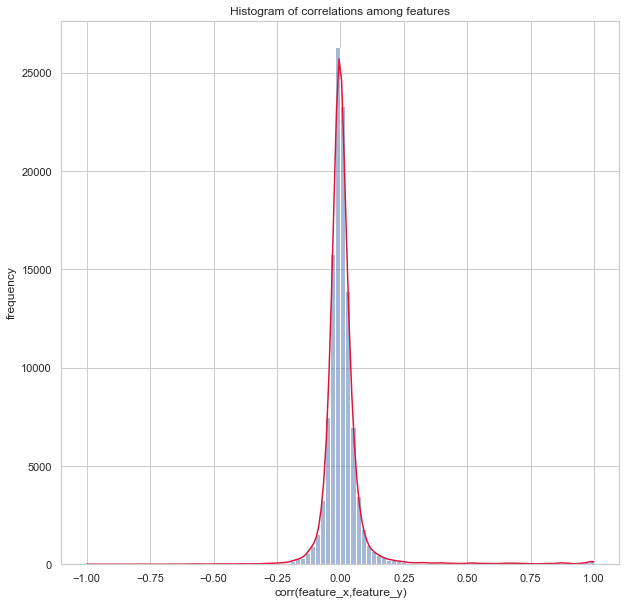

In [84]:
plt.rcParams['figure.figsize'] = (10, 10)
ax = sns.histplot(   data=df_corr_pair, x='correlation',bins=100, linewidth=1, kde=True)
ax.lines[0].set_color('crimson')
ax.lines[0].linewidth=10
ax.set(xlabel="corr(feature_x,feature_y)", ylabel = "frequency")
ax.set_title("Histogram of correlations among features")
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")

In [85]:
#Normality test for the correlation values
from scipy.stats import normaltest
normaltest(df_corr_pair['correlation'], axis=0, nan_policy='omit')

#p-value = 0.0 < alpha = 0.5 so we can reject the Null-hypothesis -> the correaltion values are not normally distributed

NormaltestResult(statistic=110888.17964696613, pvalue=0.0)

In [86]:
#max and min correlation
print(df_corr_pair['correlation'].describe(),'\n')

#max and min of abs(corr)
print(df_corr_pair[df_corr_pair['correlation']>=0].describe())

count    111933.000000
mean          0.010196
std           0.106257
min          -1.000000
25%          -0.023057
50%          -0.000947
75%           0.023940
max           1.000000
Name: correlation, dtype: float64 

        correlation
count  54634.000000
mean       0.056955
std        0.127192
min        0.000001
25%        0.010644
50%        0.024762
75%        0.049460
max        1.000000


/usr/local/anaconda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/usr/local/anaconda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/usr/local/anaconda/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



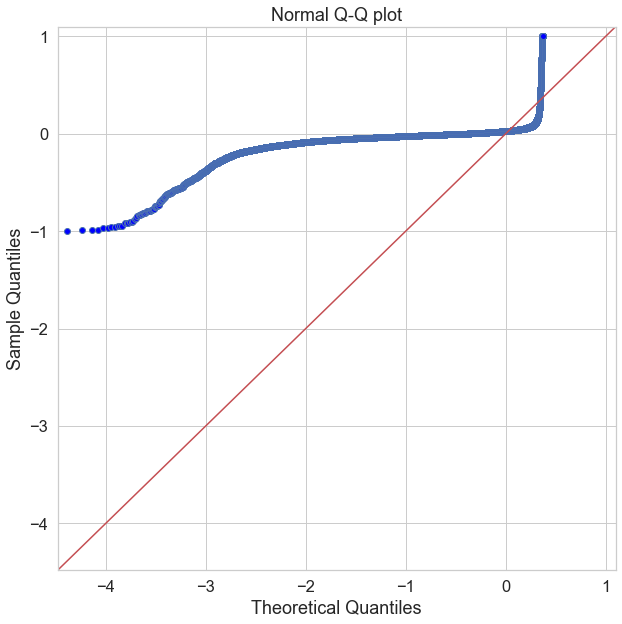

In [87]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (10, 10)
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df_corr_pair['correlation'], line='45')
plt.title("Normal Q-Q plot")
plt.show()


In [88]:
#there are many pairs spawn from 590 features
df_corr_pair.shape

(173755, 1)

In [91]:
#create frequency table for the corr pairs
df_corr_pair.apply(lambda x: pd.cut(x, bins=[0,0.2,0.4,0.6,0.8,1]).value_counts()).add_prefix('count_')
#pd_cut will label the row with [a,b] which belong that row value

,count_correlation
"(0.0, 0.2]",52111
"(0.2, 0.4]",1016
"(0.8, 1.0]",644
"(0.4, 0.6]",469
"(0.6, 0.8]",385


## 6 Duplicated features

In [92]:
#find the duplicated features (columns)
dict_duplicate_pair = {}
dict_duplicate_matches = {}
list_duplicate = []
to_remove = []
for i in range(0, len(df_features.columns)):
    l = []
    for j in range(i+1,len(df_features.columns)):
        dict_duplicate_pair[str(i+1)+';'+str(j+1)] = df_features.iloc[:,i].equals(df_features.iloc[:,j])
        if df_features.iloc[:,i].equals(df_features.iloc[:,j]) == True:
            if j not in list_duplicate:
                l.append(j)
                to_remove.append('feature'+str(j+1))
            list_duplicate.append(i)
            list_duplicate.append(j)
    if len(l)!=0:
        dict_duplicate_matches[i] = l


df_duplicate_pair = pd.DataFrame.from_dict(dict_duplicate_pair, orient='index')
df_duplicate_pair.columns=['duplicate']

df_duplicate_matches = pd.DataFrame.from_dict(dict_duplicate_matches, orient='index')

In [93]:
#number of duplicated values
len(to_remove)

104

In [95]:
#create a df to count how many duplicated features per duplicate group
df_duplicate_matches = pd.DataFrame.from_dict(dict_duplicate_matches, orient='index')
df_duplicate_matches = df_duplicate_matches.T
df_duplicate_matches

dict_count_unique_dup = {}
for c in df_duplicate_matches.columns:
    dict_count_unique_dup[c] = df_duplicate_matches[df_duplicate_matches[c].notnull()].shape[0]

df_count_unique_dup = pd.DataFrame.from_dict(dict_count_unique_dup, orient='index')
df_count_unique_dup.columns=['count_of_duplicates']
df_count_unique_dup.sort_values(by='count_of_duplicates', ascending=True, inplace=True)
df_count_unique_dup

,count_of_duplicates
141,2
13,3
178,4
52,9
190,14
256,32
97,40


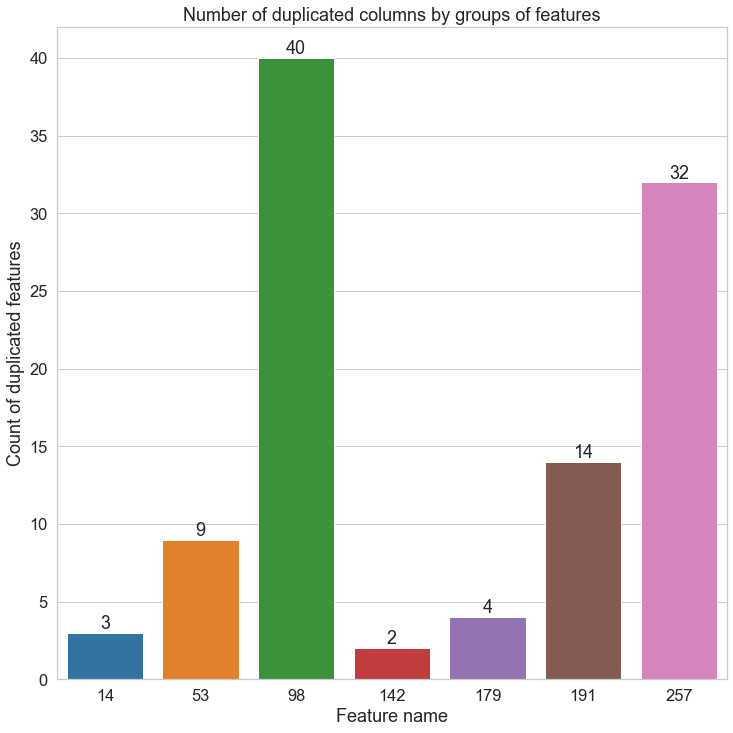

In [96]:
plt.rcParams['figure.figsize'] = (12, 12)

ax = sns.barplot(x=df_count_unique_dup.index+1,y=df_count_unique_dup['count_of_duplicates'], palette = 'tab10')

ax.bar_label(ax.containers[0])
ax.set(xlabel='Feature name', ylabel = 'Count of duplicated features')
ax.set_title('Number of duplicated columns by groups of features')
sns.set(font_scale = 1.5)

In [97]:
#example of a duplicated group
df_features.iloc[:,[97,226,229,230]]

,feature98,feature227,feature230,feature231
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
1562,0.0,0.0,0.0,0.0
1563,0.0,0.0,0.0,0.0
1564,0.0,0.0,0.0,0.0
1565,0.0,0.0,0.0,0.0


In [98]:
#example of a duplicated group
df_features.iloc[:,[13,149,284,422]] 

,feature14,feature150,feature285,feature423
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
1562,0.0,0.0,0.0,0.0
1563,0.0,0.0,0.0,0.0
1564,NaN,NaN,NaN,NaN
1565,0.0,0.0,0.0,0.0


# B. SPLITTING DATA & PROPOSING THRESHOLDS

In [99]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:590]
y = df.iloc[:,590]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1,stratify=y)

## After split: Missing values

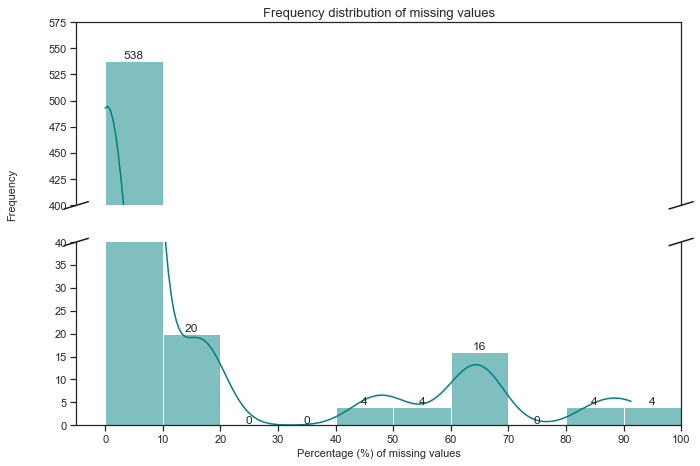

In [101]:
x_train
##proceeding with only training data 
#analysis of volatility and null values of training data 
#xtrain_desc = x_train.describe()
xtrain_eda={}
xtrain_eda=eda(x_train,xtrain_eda)
xtrain_eda1=pd.DataFrame.from_dict(xtrain_eda,orient='index')
xtrain_eda1.columns=['mean','std', 'percent_null', 'unique', 'count_3s', 'count_2s', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']
#Percent_null of features before split 
#sns.histplot(data=result1, x='percent_null',bins=20, kde=True)


#Missing values after splitting data 
#broken axis bar chart for percentage of missing_values
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")

pal = sns.color_palette(n_colors=3)

f, (ax1,ax2)= plt.subplots(2,1,sharex = True,sharey=False,figsize=(12, 8))
ax1 = sns.histplot(x="percent_null",
                   data=xtrain_eda1, palette=pal, ax=ax1,kde= True, bins=(0,10,20,30,40,50,60,70,80,90,100),color="teal")
sns.set(style="whitegrid", font="CMU Sans Serif" )
sns.set_style("ticks")

ax2 = sns.histplot(x="percent_null",
                   data=xtrain_eda1, palette=pal, ax=ax2,kde= True,bins=(0,10,20,30,40,50,60,70,80,90,100), color="teal")

ax1.set_title('Frequency distribution of missing values', fontsize=13)

ax2.bar_label(ax2.containers[0])
ax1.bar_label(ax1.containers[0])

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=0,fontsize=11)

ax1.set_ylim(400, 575)
ax2.set_ylim(0, 40)
plt.xlim(-5, 100)
plt.xticks([0, 10,20, 30, 40, 50, 60, 70, 80,90, 100, ])

ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Percentage (%) of missing values",size=11)

f.text(0.07, 0.55,"Frequency", va="center", rotation="vertical",size=11)

# Ticks on the top of the upper part and bottom of the lower part for style
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
d = .02  

kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.show()

## After split: Volatility

Text(0.85, 0.3, 'Each bar shows count and percentage of total')

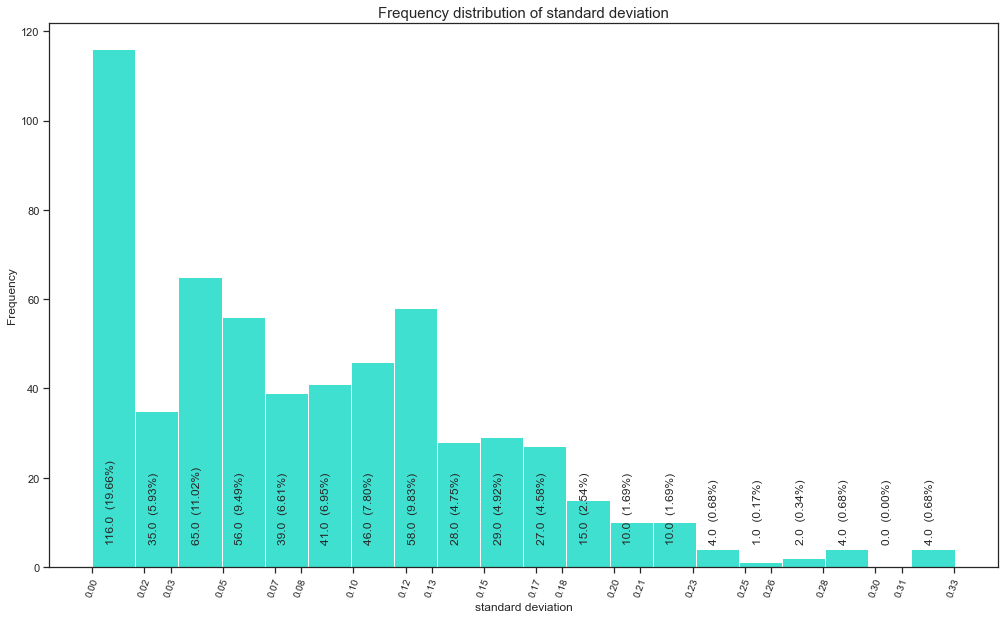

In [102]:
#scaling after splitting data 
scaler = MinMaxScaler()
df_features_scaled_2 = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

df_eda_2 = df_features_scaled_2.describe().T

# Volatility graph after splitting data without line
# Colours for different percentiles
perc_25_colour = 'aquamarine'
perc_50_colour = 'turquoise'
perc_75_colour = 'lightseagreen'
perc_95_colour = 'mediumturquoise'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(17,10))

counts, bins, patches = ax.hist(df_eda_2['std'], facecolor=perc_50_colour, bins=20, edgecolor='white')

ax.set_xticks(bins.round(2))
plt.xticks(rotation=70,fontsize=10)

# Set the graph title and axes titles
ax.set_title('Frequency distribution of standard deviation', fontsize=15)
ax.set_xlabel('standard deviation', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

# Annotation for bar values
ax.annotate('Each bar shows count and percentage of total',
            xy=(.85,.30), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=10, bbox=dict(boxstyle="round", fc="white"),
            rotation=-90)




Text(0.85, 0.3, 'Each bar shows count and percentage of total')

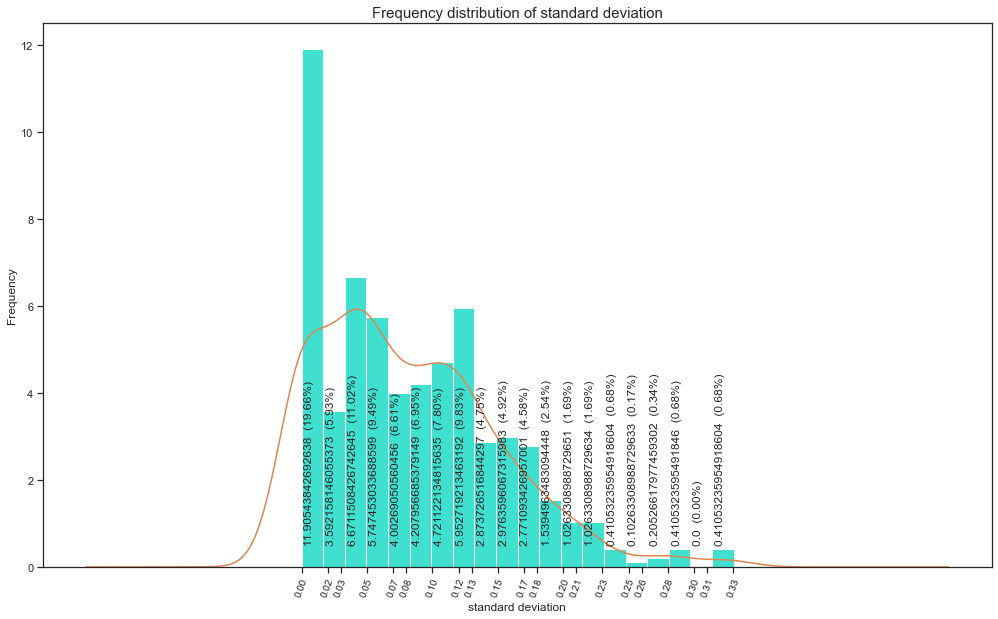

In [103]:
# Volatility after splitting data 
# Colours for different percentiles
perc_25_colour = 'aquamarine'
perc_50_colour = 'turquoise'
perc_75_colour = 'lightseagreen'
perc_95_colour = 'mediumturquoise'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(17,10))

counts, bins, patches = ax.hist(df_eda_2['std'], facecolor=perc_50_colour, bins=20, edgecolor='white',density=True)

df_eda['std'].plot(kind = "kde")


# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=70,fontsize=10)

# Set the graph title and axes titles
ax.set_title('Frequency distribution of standard deviation', fontsize=15)
ax.set_xlabel('standard deviation', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

# Annotation for bar values
ax.annotate('Each bar shows count and percentage of total',
            xy=(.85,.30), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=10, bbox=dict(boxstyle="round", fc="white"),
            rotation=-90)


## After split: Correlation

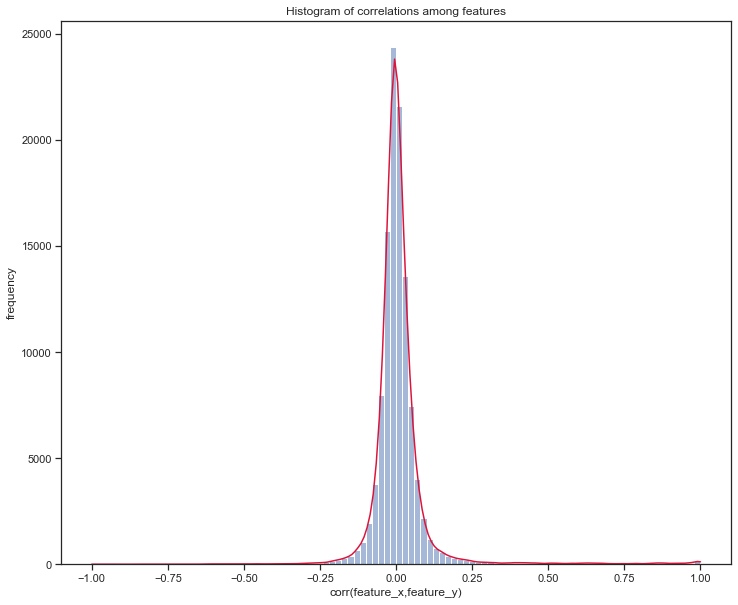

In [104]:
df_corr_x = x_train.corr()
#? if 2 features have high corr, do we remove both of them or just 1. If just 1, then which one do you remove?

dict_corr_pair_x = {}
list_high_corr_unique_x = []
threshold_corr = 0.75

#to understand the nested loop below, you should look at the top triangle of corr() matrix, we just need to loo through 1 of the 2 triangle because they are the same
 
for i in range(0, len(df_corr_x.columns)):
    for j in range(i+1,len(df_corr_x.columns)):
        dict_corr_pair_x['f'+str(i+1)+';'+'f'+str(j+1)] = df_corr_x.iloc[i,j]
        if df_corr_x.iloc[i,j] > threshold_corr:
            if i not in list_high_corr_unique_x:
                list_high_corr_unique_x.append(i)
            if j not in list_high_corr_unique_x:
                list_high_corr_unique_x.append(j)




df_corr_pair_x = pd.DataFrame.from_dict(dict_corr_pair_x, orient='index')
df_corr_pair_x.columns=['correlation']


plt.rcParams['figure.figsize'] = (12, 10)
ax = sns.histplot(data=df_corr_pair_x, x='correlation',bins=100, linewidth=1, kde=True)
ax.lines[0].set_color('crimson')
ax.lines[0].linewidth=10
ax.set(xlabel="corr(feature_x,feature_y)", ylabel = "frequency")
ax.set_title("Histogram of correlations among features")
sns.set(font_scale = 1.5)
